In [186]:
# import Libraries
import math

In [187]:
# Example Dataset
# Let's say we have a dataset with two classes, A and B
# Suppose in a dataset of 10 elements, 4 are of class A and 6 are of class B

# Number of elements in each class
n_A = 4
n_B = 6
total = n_A + n_B

In [188]:
# let's calculate the proportions
p_A = n_A / total
p_B = n_B / total

# print the proportions
print("Proportion of A: ", p_A)
print("Proportion of B: ", p_B)

Proportion of A:  0.4
Proportion of B:  0.6


In [189]:
# Entropy Calculate
# Entropy is a measure of uncertainty
entropy = -p_A * math.log2(p_A) - p_B * math.log2(p_B)
print("Entropy: ", entropy)

Entropy:  0.9709505944546686


In [190]:
# Gini impurity
# Gini impurity is a measure of misclassification
gini = 1- p_A**2 - p_B**2
print("Gini Impurity: ", gini)

Gini Impurity:  0.48


In [191]:
# Information Gain
# Assuming a split on some feature divides the dataset into two subsets
# Subset 1: 2 elements of A, 3 of B
# Subset 2: 2 elements of A, 3 of B
# Entropy and size for each subset
n_1_A, n_1_B = 2, 3
n_2_A, n_2_B = 2, 3

p_1_A = n_1_A / (n_1_A + n_1_B)
p_1_B = n_1_B / (n_1_A + n_1_B)
entropy_1 = -p_1_A * math.log2(p_1_A) - p_1_B * math.log2(p_1_B) if p_1_A and p_1_B else 0

p_2_A = n_2_A / (n_2_A + n_2_B)
p_2_B = n_2_B / (n_2_A + n_2_B)
entropy_2 = -p_2_A * math.log2(p_2_A) - p_2_B * math.log2(p_2_B) if p_2_A and p_2_B else 0

# Calculating information gain
info_gain = entropy - ((n_1_A + n_1_B) / total * entropy_1 + (n_2_A + n_2_B) / total * entropy_2)
print("Information Gain: ", info_gain)

Information Gain:  0.0


Based on our example dataset with two classes (A and B), we have calculated the following values:

1. **Entropy**: The calculated entropy of the dataset is approximately 0.971. This value indicates a moderate level of disorder in the dataset, considering that it's not very close to 0 (which would mean no disorder) and not at its maximum (which would mean complete disorder for a binary classification).

2. **Gini Impurity**: The Gini impurity for the dataset is 0.48. This value, being less than 0.5, suggests some level of purity in the dataset but still indicates a mix of classes A and B.

3. **Information Gain**: The information gain from the chosen split is 0.0. This result implies that the split did not reduce the entropy or disorder of the dataset. In other words, the split did not add any additional information that could help distinguish between classes A and B more effectively than before.

These metrics provide insight into the nature of the dataset and the effectiveness of potential splits when constructing a decision tree. In practical applications, you would use these calculations to choose the best feature and split at each node in the tree to maximize the purity of the subsets created.

---
# Decision Tree Examples in Python
## Decision Tree(Classification)

In [192]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [193]:
# load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [194]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [195]:
# drop deck column
df.drop('deck', axis=1, inplace=True)

#impute missing values of age, and fare using median
imputer = SimpleImputer(strategy='median')
df[['age', 'fare']] = imputer.fit_transform(df[['age', 'fare']])

# impute missing values of embark and embarked_town using mode
imputer = SimpleImputer(strategy='most_frequent')
df[['embark_town', 'embarked']] = imputer.fit_transform(df[['embark_town', 'embarked']])

In [196]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [198]:
# Encode the categorical and object variables using for loop and label encoder
le = LabelEncoder()
for col in df.select_dtypes(include=['category', 'object']):
    df[col] = le.fit_transform(df[col])

In [199]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [200]:
# split the data into X and y
X = df.drop(['survived', 'alive'], axis=1)
y = df['survived']
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
# create and train the model with pred
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82 23]
 [21 53]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       105
           1       0.70      0.72      0.71        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



In [202]:
# save the decision tree classifier
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./saved_models/Decision_tree_03.dot', feature_names=X.columns, filled=True, rounded=True)

## Decision Tree(Regression)

In [203]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [204]:
# import the dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [205]:
# separate the features X and the target/labels y
X = df.drop('tip', axis=1)
y = df['tip']

In [206]:
# Convert categorical variables using One-Hot Encoding
X = pd.get_dummies(X, columns=["sex", "smoker", "day", "time"], drop_first=True)

In [207]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
# create and train the model with pred
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [209]:
# predict the model
y_pred = model.predict(X_test)

In [210]:
# evaluate the model 
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ', mean_absolute_error(y_test, y_pred))

Mean Squared Error:  1.0109040271604415
R2 Score:  0.19125823885201598
RMSE:  1.0054372318352058
MAE:  0.7475061922204779


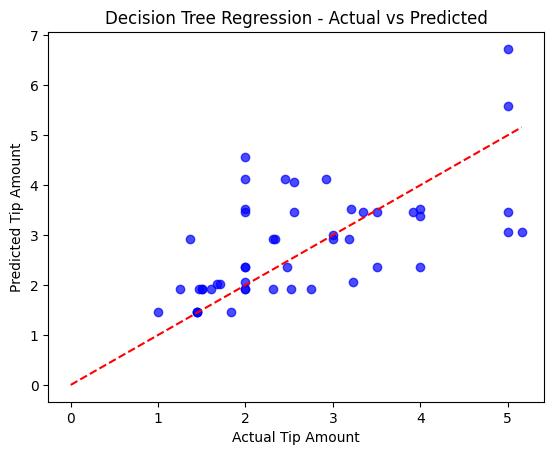

In [211]:
# Visualizing the predictions
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([0, max(y_test)], [0, max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Tip Amount")
plt.ylabel("Predicted Tip Amount")
plt.title("Decision Tree Regression - Actual vs Predicted")
plt.show()